<a href="https://colab.research.google.com/github/GoshaPopov48/GoshaPopov48/blob/main/real_estate_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Прогнозирование стоимости недвижимости - цель проекта, предсказать стоимость дома на основе его характеристик
выбран датасет : https://www.kaggle.com/datasets/camnugent/california-housing-prices/data



In [ ]:
# Устанавливаем seaborn для рисования графиков
!pip install -q seaborn

In [ ]:
# Сюда я подключаю библиотеки, все которые понадобятся в процессе работы
# будут добавлены в эту ячейку для удобства
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


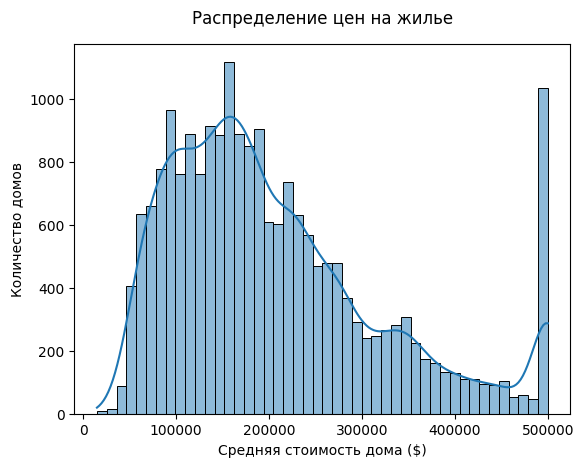

In [ ]:
# Посмотрим график распределения цен
sns.histplot(data=df, x='median_house_value', kde=True)
plt.title('Распределение цен на жилье', pad=15, fontsize=12)
plt.xlabel('Средняя стоимость дома ($)')
plt.ylabel('Количество домов')
plt.show()

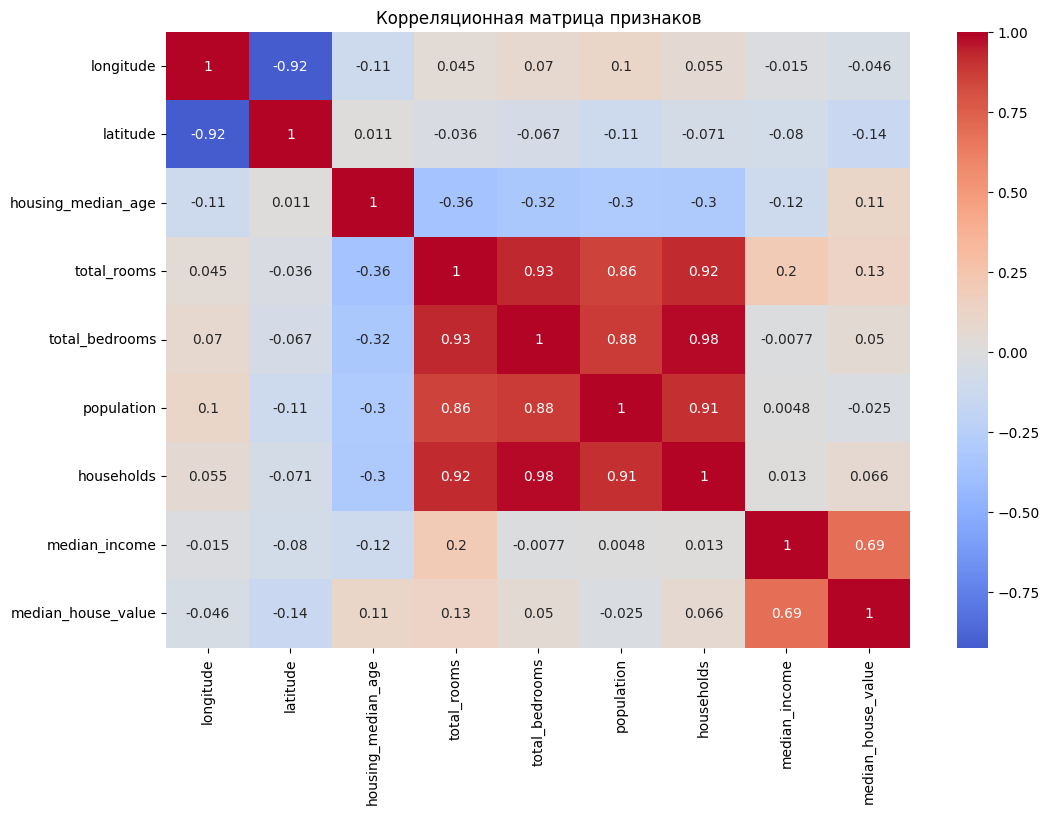

In [ ]:
# Построим матрицу корреляции что бы увидеть зависимости данных
plt.figure(figsize=(12, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица признаков')
plt.show()

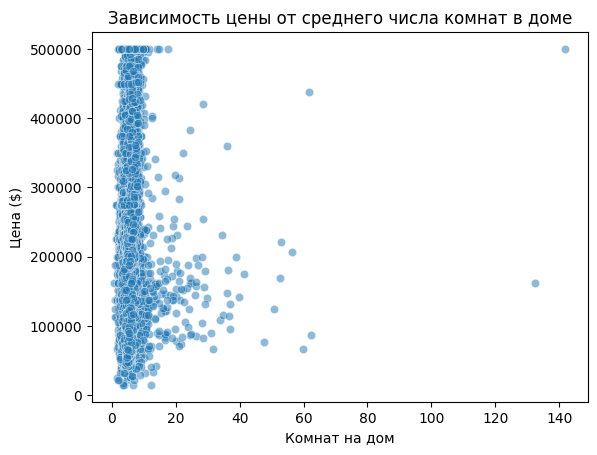

In [ ]:
# Построим график зависимости цены от количества комнат
# Высчитываем среднее кол-во комнат
df['rooms_per_house'] = df['total_rooms'] / df['households']
# Строим график
sns.scatterplot(x='rooms_per_house', y='median_house_value', data=df, alpha=0.5)
plt.title('Зависимость цены от среднего числа комнат в доме')
plt.xlabel('Комнат на дом')
plt.ylabel('Цена ($)')
plt.show()

In [ ]:
# Посмотрим насколько цена влияем на местоположение дома
fig = px.scatter_geo(df,
                     lat='latitude',
                     lon='longitude',
                     color='median_house_value',
                     hover_name='median_house_value',
                     scope='usa',
                     color_continuous_scale='viridis',
                     title='Географическое распределение цен в Калифорнии')

fig.show()

In [ ]:
# Для начала найдем пропущенные данные
df.isnull().sum()



,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:

# Затем данные заполним средним значением (медианой)
df['total_bedrooms'].fillna(df['total_bedrooms'].median())

,total_bedrooms
0,129.0
1,1106.0
2,190.0
3,235.0
4,280.0
...,...
20635,374.0
20636,150.0
20637,485.0
20638,409.0


In [ ]:
# Проверим изменения
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
# Далее преобразуем категориальную переменную, которая является строкой в бинарные столбцы (0-false, 1-True) числовые
df = pd.get_dummies(df, columns=['ocean_proximity'],
                    drop_first=True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


In [ ]:
# Делю данные на признаки и целевую переменную
x = df.drop('median_house_value', axis=1) # удаляем весь столбец
y = df['median_house_value']

In [ ]:
# Разделяю данные на обучающие и тестовые выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Нормализирую данные
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [ ]:
# Создаю и обучаю модель
model_RFR = RandomForestRegressor(n_estimators=250, random_state=42)
model_RFR.fit(x_train_scaler, y_train)

# Предсказываю целевую переменную
y_pred = model_RFR.predict(x_test_scaler)


In [ ]:
# Нормализация предсказанной цены(показываем на сколько отклонений значение меньше или больше)
scaler_y = StandardScaler()
y_train_reshape = y_train.values.reshape(-1, 1)
scaler_y.fit(y_train_reshape)

y_pred_norm = scaler_y.transform(y_pred.reshape(-1, 1))

In [ ]:
# Оцениваю модель
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

MSE: 2372924034.04
RMSE: 48712.67
R2 Score: 0.82


In [ ]:
# Пришло время сравнения реального значения, и того, что предсказали
result = pd.DataFrame({
    'Реальная цена ': y_test[:10],
    'Предсказанная цена ': y_pred[:10].round(),
    'Нормализованная цена': y_pred_norm[:10].flatten().round(2),
    'Разница ($)': (y_pred[:10] - y_test[:10]).round(2),
    'Отклонение в % ': ((y_pred[:10] - y_test[:10]) / y_test[:10] * 100).round(2)

})
print("Сравнение значений:\n")
print(result)

Сравнение значений:

       Реальная цена   Предсказанная цена   Нормализованная цена  Разница ($)  \
20046         47700.0              50471.0                 -1.36      2770.80   
3024          45800.0              69710.0                 -1.19     23909.60   
15663        500001.0             471536.0                  2.29    -28465.31   
20484        218600.0             249836.0                  0.37     31236.41   
9814         278000.0             264385.0                  0.49    -13614.80   
13311        158700.0             161175.0                 -0.40      2475.20   
7113         198200.0             223565.0                  0.14     25365.20   
7668         157500.0             167589.0                 -0.34     10088.80   
18246        340000.0             286966.0                  0.69    -53033.97   
5723         446600.0             487630.0                  2.43     41029.57   

       Отклонение в %   
20046             5.81  
3024             52.20  
15663       